# Sentiment Analysis in Parkinson's Disease - Hackathon 2020
 - **Project:** 
 - **Author(s):** 
 - **Date Notebook Started:** 06.08.2020
 - **Quick Description:** 

---
### Code outline
  1. 
  2. 
  3. 


## Mount drive to get data

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/Shared drives/Sentiment_Analysis_PD")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
import nltk
import string
import re
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS 

In [0]:
reviews = pd.read_csv('parkinsonism.csv')

In [0]:
reviews.sample(10)

,Rdate,comment,condition,drug,easeofuse,effectiveness,helpful,reviewer,satisfaction
200,6/16/2011 10:39:05 PM,no change jn simtomes,Other,benztropine oral,5,4,3,"OldArtistSoul, 25-34 Female on Treatment for ...",4
67,5/31/2010 12:20:05 PM,Don't take with Aleve gel caps.,Chronic Trouble Sleeping,Unisom Sleepgels oral,3,3,5,"alex, 55-64 Male",3
316,10/2/2008 4:11:24 PM,This is the second time I have been on this me...,Fatigue associated with Multiple Sclerosis,amantadine HCl oral,5,5,15,25-34 Female on Treatment for less than 1 mon...,5
404,1/7/2009 12:48:04 PM,I have found the TABLETS work better for me\r\...,Chronic Trouble Sleeping,diphenhydramine oral,5,4,9,45-54 Female on Treatment for 2 to less than ...,4
187,10/16/2007 3:09:08 PM,puts me to sleep.,Other,benztropine oral,5,5,6,"Doctor Mom, 45-54 Female on Treatment for 1 t...",5
323,1/20/2010 8:04:55 AM,So far the medicine has reduce my tireness fro...,Fatigue associated with Multiple Sclerosis,amantadine HCl oral,5,4,12,"fieldplanner, 55-64 Male on Treatment for 1 t...",5
193,8/11/2010 4:26:25 PM,After being on this medication for only a few ...,Other,benztropine oral,5,5,9,"gmveranes, 25-34 Female on Treatment for less...",5
533,4/23/2017 10:28:52 PM,Takes 45 min. before becoming effective before...,Chronic Trouble Sleeping,diphenhydramine oral,4,4,6,"Sleepy, 65-74 on Treatment for 6 months to les...",3
39,8/7/2010 2:45:57 PM,"Rapid heartbeat, nausea, confusion, tingling i...",Chronic Trouble Sleeping,Benadryl oral,5,5,26,"Cassandra09231d, 19-24 Female on Treatment fo...",5
264,10/11/2010 12:35:16 PM,I am having low grade headaches which I rarely...,Chronic Trouble Sleeping,diphenhydramine citrate oral,5,5,0,"rdg, 75 or over Female on Treatment for less ...",5


In [0]:
reviews['drug'].value_counts()

diphenhydramine oral              157
ZzzQuil oral                      111
Benadryl oral                      60
amantadine HCl oral                50
carbidopa-levodopa oral            37
Cogentin oral                      28
Sinemet oral                       28
benztropine oral                   25
Artane oral                        18
Benadryl Allergy oral              18
Sleep Aid diphenhydramine oral     17
Simply Sleep oral                  11
Rytary oral                        10
diphenhydramine citrate oral       10
Unisom Sleepgels oral               9
Wal-Som diphenhydramine oral        9
trihexyphenidyl oral                8
Sominex oral                        8
Unisom SleepMelts oral              6
Benadryl injection                  6
Name: drug, dtype: int64

In [0]:
conditions = [
    (reviews['drug'] == 'amantadine HCl oral'),
    (reviews['drug'] == 'carbidopa-levodopa oral'),
    (reviews['drug'] == 'Cogentin oral'),
    (reviews['drug'] == 'Sinemet oral'),
    (reviews['drug'] == 'benztropine oral'),
    (reviews['drug'] == 'Artane oral'),
    (reviews['drug'] == 'Rytary oral'),
    (reviews['drug'] == 'trihexyphenidyl oral')]
choices = ['amantadine', 'carbidopa-levodopa', 'benztropine', 'carbidopa-levodopa', 'benztropine', 'trihexyphenidyl', 'carbidopa-levodopa','trihexyphenidyl']
reviews['drug_cat'] = np.select(conditions, choices, default='diphenhydramine')

In [0]:
fig = pd.DataFrame(reviews['drug_cat'].value_counts())
fig2 = px.pie(fig, values= 'drug_cat' , names= fig.index, title='Drug reviews from WebMD')
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.show()

In [0]:
reviews['sat_cat'] = reviews['satisfaction'].astype('category')
reviews['sat_cat']

0      5
1      1
2      1
3      4
4      5
      ..
621    5
622    1
623    1
624    3
625    4
Name: sat_cat, Length: 626, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [0]:
reviews['sat_cat'].value_counts()

5    213
1    141
4    131
3     89
2     52
Name: sat_cat, dtype: int64

In [0]:
drug_revs = reviews.iloc[: , 9:11]
drug_revs.to_csv('webmd_drug_sat_barplot.csv', index=False)

## PD Sentiment on Social Media

### Scraping Reddit

Read in data from Reddit, 'submissions' refers to originial posts and 'comments' refers to comments associated with posts.

In [0]:
submissions_data = pd.read_csv("parkinsons_submissions_June2020.csv")
comments_data = pd.read_csv("parkinsons_comments_June2020.csv")

In [0]:
submissions_data.info()
comments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3033 non-null   int64  
 1   title       3033 non-null   object 
 2   author      3033 non-null   object 
 3   score       3033 non-null   int64  
 4   id          3033 non-null   object 
 5   url         3033 non-null   object 
 6   comms_num   3033 non-null   int64  
 7   created     3033 non-null   float64
 8   body        1969 non-null   object 
 9   timestamp   3033 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 237.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14817 non-null  int64  
 1   parent_id         14817 non-null  object 
 2   link_id           14817 non-null  o

In [0]:
submissions_data.head()

,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp
1,1,I have Parkinson's or MSA,zerocool7701,3,gyeg5f,https://www.reddit.com/r/Parkinsons/comments/g...,7,1.591573e+09,i ve been dealing with strange health issues f...,2020-06-07 19:31:36
2,2,What is the point of being a caregiver?,mlportersr,9,gya6zk,https://www.reddit.com/r/Parkinsons/comments/g...,2,1.591556e+09,reaching out in love chapter sometimes y...,2020-06-07 14:54:05
4,4,Do these tremors seem like Parkinson’s?,wanderingdust,1,gxk4jh,https://www.reddit.com/r/Parkinsons/comments/g...,5,1.591446e+09,year old male my whole body has a tremor i...,2020-06-06 08:13:02
5,5,Guilt About Living Apart from Dad with PD,jules1783,24,gxc5l3,https://www.reddit.com/r/Parkinsons/comments/g...,10,1.591417e+09,title pretty much says it all my dad was diag...,2020-06-06 00:16:20
6,6,What are you getting your dad for Father’s Day?,plutoniumwhisky,7,gx1yi0,https://www.reddit.com/r/Parkinsons/comments/g...,6,1.591381e+09,he s not a beer drinker never played golf us...,2020-06-05 14:21:32


In [0]:
comments_data.head()

,Unnamed: 0,parent_id,link_id,subreddit_id,author,id,score,created,body,controversiality,link_id_tidy,timestamp
0,0,t1_ftanm90,t3_gyeg5f,t5_2u0be,ParkieDude,ftd37ak,2,1.591648e+09,Interestingly the comment was downvoted.\n\nI'...,0,gyeg5f,2020-06-08 16:29:29
1,1,t1_frz3ajp,t3_gre324,t5_2u0be,ibuljeta,ftcl5om,1,1.591631e+09,"Not any specific letter, but your question mad...",0,gre324,2020-06-08 11:43:58
2,2,t1_frygism,t3_gre324,t5_2u0be,ibuljeta,ftckqvv,1,1.591631e+09,"Sorry for taking a bit longer to reply, but en...",0,gre324,2020-06-08 11:37:39
3,3,t1_ftbzbzt,t3_gygdo7,t5_2u0be,i_like_bread_crumbs,ftcanew,1,1.591622e+09,Thanks for the answer.I am OK now.The tremors ...,0,gygdo7,2020-06-08 09:16:13
4,4,t3_gxk4jh,t3_gxk4jh,t5_2u0be,amc6138,ftc93nn,1,1.591621e+09,Yes,0,gxk4jh,2020-06-08 08:56:39


In [0]:
submissions_data = submissions_data[submissions_data["body"].notna()]
submissions_data = submissions_data[submissions_data["body"] != "[deleted]"]

submissions_data["body"] = [re.sub(r'[^\w\s]','', x) for x in submissions_data["body"]]
submissions_data["body"] = [re.sub(r'\n',' ', x) for x in submissions_data["body"]]
submissions_data["body"] = [re.sub(r'[0-9]',' ', x) for x in submissions_data["body"]]
submissions_data["body"] = [x.lower() for x in submissions_data["body"]]
submissions_data = submissions_data[[len(x) > 5 for x in submissions_data["body"]]]

In [17]:
submissions_data

,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp
1,1,I have Parkinson's or MSA,zerocool7701,3,gyeg5f,https://www.reddit.com/r/Parkinsons/comments/g...,7,1.591573e+09,i ve been dealing with strange health issues f...,2020-06-07 19:31:36
2,2,What is the point of being a caregiver?,mlportersr,9,gya6zk,https://www.reddit.com/r/Parkinsons/comments/g...,2,1.591556e+09,reaching out in love chapter sometimes y...,2020-06-07 14:54:05
4,4,Do these tremors seem like Parkinson’s?,wanderingdust,1,gxk4jh,https://www.reddit.com/r/Parkinsons/comments/g...,5,1.591446e+09,year old male my whole body has a tremor i...,2020-06-06 08:13:02
5,5,Guilt About Living Apart from Dad with PD,jules1783,24,gxc5l3,https://www.reddit.com/r/Parkinsons/comments/g...,10,1.591417e+09,title pretty much says it all my dad was diag...,2020-06-06 00:16:20
6,6,What are you getting your dad for Father’s Day?,plutoniumwhisky,7,gx1yi0,https://www.reddit.com/r/Parkinsons/comments/g...,6,1.591381e+09,he s not a beer drinker never played golf us...,2020-06-05 14:21:32
...,...,...,...,...,...,...,...,...,...,...
3003,3003,Does anyone use a Photon Genius and does it work?,koen1007,1,1uq0oj,https://www.reddit.com/r/Parkinsons/comments/1...,2,1.389230e+09,my father has parkinson s and recently bought ...,2014-01-08 20:18:21
3005,3005,DIY laser cane assist (very cheap option),ari_giblets,7,1qto1l,https://www.reddit.com/r/Parkinsons/comments/1...,1,1.384727e+09,for those who have pd with difficulty in walki...,2013-11-17 17:25:46
3012,3012,My company is looking for Parkinson's patients...,resolutionresearch,1,1kvy8b,https://www.reddit.com/r/Parkinsons/comments/1...,0,1.377222e+09,we are a market research firm in denver co ...,2013-08-22 21:43:13
3013,3013,So my dad has Parkinson's Disease . . .,alphajager,4,1ku2c2,https://www.reddit.com/r/Parkinsons/comments/1...,3,1.377153e+09,my dad was diagnosed with parkinson s disease ...,2013-08-22 02:28:19


In [6]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
from nltk.corpus import stopwords
sr = stopwords.words('english')

sr = sr + ["I", "My", "I'm", "like", "He", "know", "would", "get", "years", "really", "also", "The", "She", 
     "anyone", "I've", "It", "it", "We", "could", "he's", "someone", "https", "www", "com", "one", "pd", "see",
     "even", "still", "go", "since", "two", "months", "thanks", "got", "sure", "home", "ago", "around", "every", "times", "way", "may", "much",
     "day", "things", "lot", "first", "recently", "said", "make", "something", "days", "week", "back", "say", "side", "hour", "year", "u", "hi",
     "etc", "many", "people", "find", "going", "hello", "le", "three", "right"]

clean_tokens = []
for comment in submissions_data["body"]:
    
    tokens = [t for t in comment.split()]
    
    for token in tokens:
        
        if token not in sr:
            
            if len(token) > 1:
            
                clean_tokens.append(token)

lemmatizer = nltk.stem.WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in clean_tokens]

fdist = nltk.FreqDist(lemmas)

In [20]:
fdist.most_common(100)

[('parkinson', 1524),
 ('help', 720),
 ('time', 614),
 ('symptom', 604),
 ('disease', 528),
 ('tremor', 514),
 ('feel', 475),
 ('diagnosed', 470),
 ('want', 420),
 ('dad', 418),
 ('take', 416),
 ('doctor', 406),
 ('hand', 390),
 ('think', 367),
 ('life', 360),
 ('work', 332),
 ('last', 330),
 ('well', 295),
 ('father', 295),
 ('need', 294),
 ('medication', 290),
 ('good', 285),
 ('mom', 280),
 ('started', 270),
 ('family', 269),
 ('issue', 268),
 ('getting', 268),
 ('experience', 256),
 ('care', 247),
 ('anything', 244),
 ('neurologist', 234),
 ('sleep', 225),
 ('old', 223),
 ('thought', 221),
 ('med', 221),
 ('worse', 217),
 ('better', 205),
 ('question', 205),
 ('able', 202),
 ('diagnosis', 200),
 ('never', 197),
 ('taking', 197),
 ('patient', 197),
 ('trying', 196),
 ('body', 195),
 ('mother', 195),
 ('keep', 193),
 ('long', 192),
 ('brain', 191),
 ('new', 187),
 ('effect', 187),
 ('hard', 185),
 ('u', 183),
 ('left', 181),
 ('thank', 181),
 ('bad', 180),
 ('pain', 180),
 ('night', 

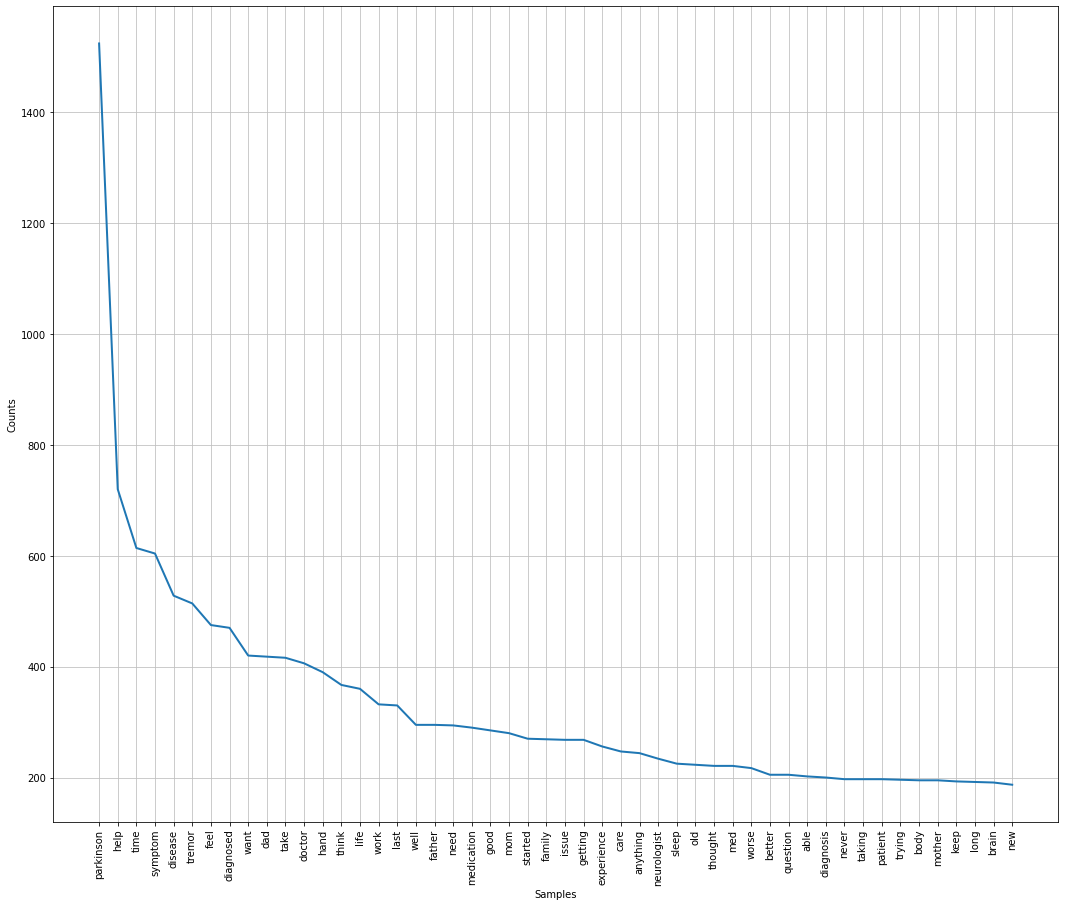

In [0]:
freq = nltk.FreqDist(lemmas)
plt.figure(figsize=(18, 15))
freq.plot(50, cumulative=False)

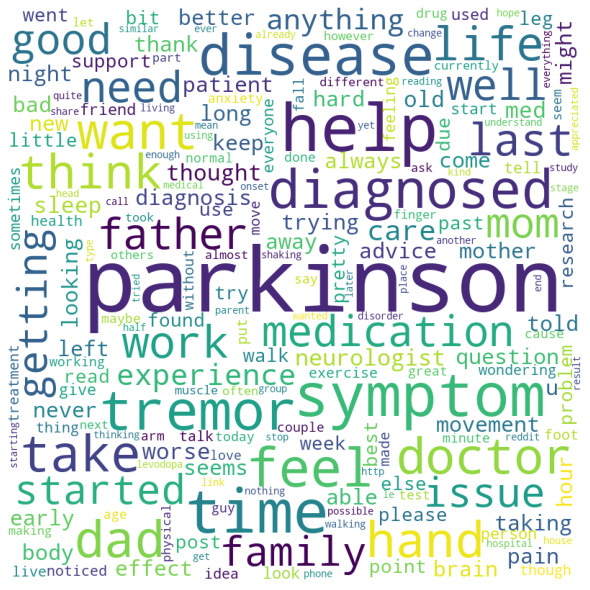

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(fdist) 


plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
cloud =  wordcloud.to_file('reddit_wordcloud.png')

In [0]:
freqs = pd.DataFrame(data = fdist, index=[0])
freqs2 = freqs.transpose()
freqs2.reset_index(level=0, inplace=True)
freqs2.columns = ['word', 'freq']
freqs2
freqs2.to_csv('reddit_post_word_freqs.csv')


In [0]:
output = list(nltk.trigrams(clean_tokens))
fdist = nltk.FreqDist(output)
fdist.most_common(100)

[(('ncbi', 'nlm', 'nih'), 28),
 (('nlm', 'nih', 'gov'), 27),
 (('deep', 'brain', 'stimulation'), 22),
 (('michael', 'fox', 'foundation'), 19),
 (('dad', 'diagnosed', 'parkinson'), 18),
 (('movement', 'disorder', 'specialist'), 17),
 (('diagnosed', 'parkinson', 'disease'), 17),
 (('early', 'onset', 'parkinson'), 17),
 (('reddit', 'parkinsons', 'comments'), 15),
 (('clinicaltrials', 'gov', 'ct'), 15),
 (('gov', 'ct', 'show'), 14),
 (('ct', 'show', 'nct'), 14),
 (('father', 'diagnosed', 'parkinson'), 14),
 (('diagnosed', 'early', 'onset'), 13),
 (('please', 'feel', 'free'), 12),
 (('en', 'wikipedia', 'org'), 12),
 (('wikipedia', 'org', 'wiki'), 12),
 (('nih', 'gov', 'pmc'), 11),
 (('gov', 'pmc', 'articles'), 11),
 (('pmc', 'articles', 'pmc'), 11),
 (('long', 'term', 'care'), 11),
 (('rock', 'steady', 'boxing'), 10),
 (('nih', 'gov', 'pubmed'), 10),
 (('jpg', 'width', 'format'), 10),
 (('width', 'format', 'pjpg'), 10),
 (('format', 'pjpg', 'auto'), 10),
 (('pjpg', 'auto', 'webp'), 10),
 ((

In [0]:
from nltk.tokenize import sent_tokenize

clean_tokens = []
for comment in submissions_data["body"]:
    
    tokens = [t for t in sent_tokenize(comment)]
    
    for token in tokens:
        
        if token not in sr:
            
            if len(token) > 1:
            
                clean_tokens.append(token)

lemmatizer = nltk.stem.WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in clean_tokens]

fdist = nltk.FreqDist(lemmas)

In [0]:
fdist.most_common(100)

[('i ve been dealing with strange health issues for about eight years or so   last year i was referred to a well respected neurologist who specializes in movement disorders   i have been to him three times and he is swaying towards parkinson s but cannot rule out msa  multiple system atrophy    i am simply not the same person i used to be and it makes me sad  i have very little pleasure in life because of this disease   i m',
  1),
 ('reaching out in love   chapter     sometimes you can t help but wonder what is the point of all your effort   or if there even is a point  this feeling is particularly troublesome when it results from the words of people who really should know better  but hear this  burning your candle at both ends to take care of someone with a chronic disease doesn t make you crazy   to the contrary it may make you the sanest person in the room   https   www reachingout love blog what is the point really',
  1),
 ('   year old male  my whole body has a tremor issue that

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []




for line in submissions_data["body"]:
    pol_score = sia.polarity_scores(line)
    pol_score['body'] = line
    results.append(pol_score)

print(results[:3])

df = pd.DataFrame.from_records(results)
df.head()
#`compound` ranges from -1 (Extremely Negative) to 1 (Extremely Positive).

#positive label if compound greater than 0.3, negative if under -0.3
df['label'] = 0
df.loc[df['compound'] > 0.3, 'label'] = 1
df.loc[df['compound'] < -0.3, 'label'] = -1
df

[{'neg': 0.07, 'neu': 0.821, 'pos': 0.109, 'compound': 0.4728, 'body': 'i ve been dealing with strange health issues for about eight years or so   last year i was referred to a well respected neurologist who specializes in movement disorders   i have been to him three times and he is swaying towards parkinson s but cannot rule out msa  multiple system atrophy    i am simply not the same person i used to be and it makes me sad  i have very little pleasure in life because of this disease   i m    '}, {'neg': 0.074, 'neu': 0.721, 'pos': 0.205, 'compound': 0.9208, 'body': 'reaching out in love   chapter     sometimes you can t help but wonder what is the point of all your effort   or if there even is a point  this feeling is particularly troublesome when it results from the words of people who really should know better  but hear this  burning your candle at both ends to take care of someone with a chronic disease doesn t make you crazy   to the contrary it may make you the sanest person in

,neg,neu,pos,compound,body,label
0,0.070,0.821,0.109,0.4728,i ve been dealing with strange health issues f...,1
1,0.074,0.721,0.205,0.9208,reaching out in love chapter sometimes y...,1
2,0.017,0.894,0.089,0.5606,year old male my whole body has a tremor i...,1
3,0.033,0.827,0.140,0.9628,title pretty much says it all my dad was diag...,1
4,0.061,0.752,0.187,0.6327,he s not a beer drinker never played golf us...,1
...,...,...,...,...,...,...
1494,0.096,0.824,0.079,-0.2635,my father has parkinson s and recently bought ...,0
1495,0.050,0.805,0.145,0.8006,for those who have pd with difficulty in walki...,1
1496,0.000,0.984,0.016,0.2732,we are a market research firm in denver co ...,0
1497,0.082,0.808,0.110,0.8649,my dad was diagnosed with parkinson s disease ...,1


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [0]:


def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [0]:
print_sentiment_scores('I am simply not the same person I used to be and it makes me sad I have very little pleasure in life because of this disease')

I am simply not the same person I used to be and it makes me sad I have very little pleasure in life because of this disease {'neg': 0.098, 'neu': 0.787, 'pos': 0.116, 'compound': 0.1494}


In [0]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentence = 'Again, human interaction needs to have resolutions. Your reps cannot BLAME the system and shrug off being able to help. Let alone blame the system and not know WHY the system makes indiscriminate decisions.'
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
    neu_word_list.append(word)                

print('Positive:',pos_word_list)        
print('Neutral:',neu_word_list)    
print('Negative:',neg_word_list) 
score = sid.polarity_scores(sentence)
print('\nScores:', score)

filter posts by words, break down how many caretakers/how many patients

In [0]:
submissions_data[submissions_data['body'].str.contains("dad") | submissions_data['body'].str.contains("father") | submissions_data['body'].str.contains("mom")
| submissions_data['body'].str.contains("mother") |  submissions_data['body'].str.contains("parent") | submissions_data['body'].str.contains("grandfather")
| submissions_data['body'].str.contains("grandmother") | submissions_data['body'].str.contains("grandma") | submissions_data['body'].str.contains("grandpa")
| submissions_data['body'].str.contains("grandparent")]

,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp
5,5,Guilt About Living Apart from Dad with PD,jules1783,24,gxc5l3,https://www.reddit.com/r/Parkinsons/comments/g...,10,1.591417e+09,title pretty much says it all my dad was diag...,2020-06-06 00:16:20
7,7,Therapy dog organizations,bougiesmoothie,2,gwpcat,https://www.reddit.com/r/Parkinsons/comments/g...,8,1.591331e+09,hi my mom has parkinson s and is looking for ...,2020-06-05 00:20:38
9,9,"Using CBD and THC for Parkinson’s, any one els...",cedartrail,10,gvy2l2,https://www.reddit.com/r/Parkinsons/comments/g...,2,1.591233e+09,my father in law is using cbd and thc to treat...,2020-06-03 21:17:55
14,14,Help finding shoes to suggest to my farmer/cow...,Valdeisum,7,gvhbem,https://www.reddit.com/r/Parkinsons/comments/g...,3,1.591165e+09,my dad is a year old farmer with parkinson ...,2020-06-03 02:23:06
23,23,Mental Health issues many years in advance of ...,shinyshine1,2,gu0mlz,https://www.reddit.com/r/Parkinsons/comments/g...,7,1.590966e+09,my mother was diagnosed with parkinson s a cou...,2020-05-31 19:04:06
...,...,...,...,...,...,...,...,...,...,...
2995,2995,Parkinson's Dementia and Hallucinations,fleazus,4,1xb88c,https://www.reddit.com/r/Parkinsons/comments/1...,8,1.391843e+09,my year old father has been diagnosed since...,2014-02-08 01:58:19
3001,3001,Best tablets for people with tremors?,brickhadatrident,2,1vlq3x,https://www.reddit.com/r/Parkinsons/comments/1...,1,1.390182e+09,my grandfather has been diagnosed with parkins...,2014-01-19 20:32:47
3003,3003,Does anyone use a Photon Genius and does it work?,koen1007,1,1uq0oj,https://www.reddit.com/r/Parkinsons/comments/1...,2,1.389230e+09,my father has parkinson s and recently bought ...,2014-01-08 20:18:21
3013,3013,So my dad has Parkinson's Disease . . .,alphajager,4,1ku2c2,https://www.reddit.com/r/Parkinsons/comments/1...,3,1.377153e+09,my dad was diagnosed with parkinson s disease ...,2013-08-22 02:28:19


In [0]:
 656/1499

0.437625083388926

filter by drug names and compare sentiment
levodopa
levodopa and something else

In [0]:
### might need to link up the posts and the comments to make sure we're getting comments that might not mention the drug by name but are referecing it..
### 'link_id_tidy' in the comments matches the 'id' column in submissions



submissions_data[submissions_data['body'].str.contains("levodopa") | 
                 submissions_data['body'].str.contains("L-DOPA") |
                 submissions_data['body'].str.contains("sinemet")|
                 submissions_data['body'].str.contains("carbidopa")]

## now do sentiment analysis



,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp
9,9,"Using CBD and THC for Parkinson’s, any one els...",cedartrail,10,gvy2l2,https://www.reddit.com/r/Parkinsons/comments/g...,2,1.591233e+09,my father in law is using cbd and thc to treat...,2020-06-03 21:17:55
47,47,Early Onset Diagnosis Advice,AreYouMeOneTwoThree,10,gns1nt,https://www.reddit.com/r/Parkinsons/comments/g...,11,1.590073e+09,hello all my fiancé was recently diagnosed w...,2020-05-21 11:03:26
107,107,Sinemet Dosage,sim_kyy,2,g94oyv,https://www.reddit.com/r/Parkinsons/comments/g...,3,1.588036e+09,is it possible to crush sinemet in juice etc s...,2020-04-27 21:03:54
108,108,FDA approves opicapone (Ongentys),mudfud27,9,g92i65,https://www.reddit.com/r/Parkinsons/comments/g...,3,1.588029e+09,https www biospace com article releases neur...,2020-04-27 19:11:51
135,135,Axovant vs Voyager : who'll win?,iammdeepak,7,g3crz7,https://www.reddit.com/r/Parkinsons/comments/g...,0,1.587194e+09,https www asgct org research news april ...,2020-04-18 03:11:21
...,...,...,...,...,...,...,...,...,...,...
2713,2713,Four years and incapacitated for Parkinson's d...,ParkinsonSon,3,3nfh6f,https://www.reddit.com/r/Parkinsons/comments/3...,10,1.443970e+09,my dad was diagnosed about years ago year ...,2015-10-04 10:52:51
2726,2726,TOTD: Zofran is your friend,ParkieDude,5,3lyqb4,https://www.reddit.com/r/Parkinsons/comments/3...,0,1.442974e+09,discovered promethazine phenergan blocks lev...,2015-09-22 22:08:57
2739,2739,"ongoing shakiness, prickly head, and anxiety",acciolube,2,3jy5m5,https://www.reddit.com/r/Parkinsons/comments/3...,2,1.441640e+09,my mother s had parkinson s for years she ...,2015-09-07 11:35:01
2824,2824,Does anyone here take or know someone w/ pd wh...,kfull,7,2wdixl,https://www.reddit.com/r/Parkinsons/comments/2...,12,1.424335e+09,my dad was just put on sinemet today after his...,2015-02-19 03:34:43


filter for other therapeutics, 

Filter for MAO-B inhibitors

In [0]:
###Filter for MAO-B inhibitors - Rasagiline (I also include incorrect spellings), Selegiline, Safinamide
submissions_data[submissions_data['body'].str.contains("rasagiline") | 
                 submissions_data['body'].str.contains("rasagaline") | ###Incorrect spelling of Rasagiline
                 submissions_data['body'].str.contains("selegiline") | 
                 submissions_data['body'].str.contains("selegeline") | ###Incorrect spelling of Selegiline
                 submissions_data['body'].str.contains("safinamide")]


,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp
46,46,What time of day,fifasol,1,golkzi,https://www.reddit.com/r/Parkinsons/comments/g...,7,1.590191e+09,do you take your rasagiline have you tried d...,2020-05-22 19:37:55
248,248,Are metabolites of l-deprenyl (selegiline) use...,idontknow-1987,2,fal6yo,https://www.reddit.com/r/Parkinsons/comments/f...,0,1.582875e+09,https link springer com chapter ...,2020-02-28 02:35:01
260,260,Selegiline and amphetamines metabolites toxicity,idontknow-1987,6,f8cmwa,https://www.reddit.com/r/Parkinsons/comments/f...,20,1.582508e+09,hi doctors prescribed me an antiparkinson dru...,2020-02-23 20:33:33
304,304,Severe Rytary Reaction,MediumWestern,10,f1n0ns,https://www.reddit.com/r/Parkinsons/comments/f...,5,1.581349e+09,if anyone has any suggestions please share o...,2020-02-10 10:35:44
336,336,"How does ""freezing"" start to manifest? Anyone ...",ryno68,3,ewtpe6,https://www.reddit.com/r/Parkinsons/comments/e...,2,1.580528e+09,approx weeks ago i had a brief episode of v...,2020-01-31 22:41:19
807,807,Any experience taking Azilect / Rasagiline?,None,5,cgmfky,https://www.reddit.com/r/Parkinsons/comments/c...,9,1.563876e+09,my dad s neurologist prescribed him rasagiline...,2019-07-23 06:01:47
853,853,Seeking historical info re: Selegiline in Canada,FinancialDepth,1,c8c4rc,https://www.reddit.com/r/Parkinsons/comments/c...,1,1.562118e+09,iirc in the s a canadian senator with parki...,2019-07-02 21:33:29
871,871,Selegiline,FivefingerDeathmama,4,c52fp1,https://www.reddit.com/r/Parkinsons/comments/c...,6,1.561466e+09,so i ve recently started taking selegiline alo...,2019-06-25 08:28:13
971,971,"Quick question: Father has Parkinsons, no incr...",innabhagavadgitababy,1,bpkref,https://www.reddit.com/r/Parkinsons/comments/b...,20,1.558084e+09,my father was diagnosed about years ago h...,2019-05-17 05:03:56
1126,1126,Feeling off balance after the flu,dianne116,6,b0bkrd,https://www.reddit.com/r/Parkinsons/comments/b...,3,1.552446e+09,hi there i am and i have been on rasagilin...,2019-03-12 22:59:58


Other drugs : 
[anticholinergic drugs with diphenhydramine](https://www.parkinson.org/blog/whats-hot/anticholinergic-drugs), benztropine, trihexypenidyl, amantadine


In [0]:
##filter anticholinergic drugs
submissions_data[submissions_data['body'].str.contains("diphenhydramine") |
                 submissions_data['body'].str.contains("benadryl")|
                 submissions_data['body'].str.contains("anticholinergic")]

,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp
822,822,UGH!! Hospital Rant for my mother.,kisarax,3,cefkn5,https://www.reddit.com/r/Parkinsons/comments/c...,6,1.563412e+09,my mother just started rytary a week or so ago...,2019-07-17 20:59:41
1906,1906,Anticholinergic nightmare,Roogly,2,7g93lx,https://www.reddit.com/r/Parkinsons/comments/7...,1,1.511945e+09,i went thru a period where i ate benadryl rec...,2017-11-29 03:48:54
1983,1983,Help with atypical symptoms,bunkinpumpkin,4,725srl,https://www.reddit.com/r/Parkinsons/comments/7...,3,1.506297e+09,hi i know the thread says you guys are not fo...,2017-09-24 19:53:03


In [0]:
##filter benztropine
submissions_data[submissions_data['body'].str.contains("benztropine")]

,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp


In [0]:
##filter trihexyphenidyl
submissions_data[submissions_data['body'].str.contains("trihexyphenidyl")|
                 submissions_data['body'].str.contains("artane")|
                 submissions_data['body'].str.contains("parkinane")]

,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp
1013,1013,Low side effect medication,jfr2300,3,bj9xqn,https://www.reddit.com/r/Parkinsons/comments/b...,4,1.556694e+09,my mom had to quit artane and amantadine due t...,2019-05-01 02:55:24
2739,2739,"ongoing shakiness, prickly head, and anxiety",acciolube,2,3jy5m5,https://www.reddit.com/r/Parkinsons/comments/3...,2,1.441640e+09,my mother s had parkinson s for years she ...,2015-09-07 11:35:01
2864,2864,Mother has PD - just seeking advice,mohmunmuk,7,2ory13,https://www.reddit.com/r/Parkinsons/comments/2...,16,1.418177e+09,hi there my mother is and has pd she wa...,2014-12-09 21:09:39


In [0]:
##filter amantadine
submissions_data[submissions_data['body'].str.contains("amantadine")|
                 submissions_data['body'].str.contains("mantadix")]

,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp
254,254,Amantadine and corneal edema,urbanchicken1,17,f9f84p,https://www.reddit.com/r/Parkinsons/comments/f...,2,1.582686e+09,my mom was diagnosed with pd almost ye...,2020-02-25 22:03:21
360,360,Question about medication,porntip22,3,etp5pg,https://www.reddit.com/r/Parkinsons/comments/e...,11,1.579976e+09,diagnosed about years ago serious denial u...,2020-01-25 13:17:57
380,380,Young Onset of Parkinsons Disease,kronstudios,6,eqaii2,https://www.reddit.com/r/Parkinsons/comments/e...,12,1.579343e+09,i am a seattle producer that has recently bee...,2020-01-18 05:26:16
1013,1013,Low side effect medication,jfr2300,3,bj9xqn,https://www.reddit.com/r/Parkinsons/comments/b...,4,1.556694e+09,my mom had to quit artane and amantadine due t...,2019-05-01 02:55:24
1287,1287,I Have Parkinson's And My 'Off' Periods Are Su...,AnthonyRoberson,15,abvlxq,https://www.reddit.com/r/Parkinsons/comments/a...,9,1.546480e+09,i am a year old male and i have been diagno...,2019-01-02 20:42:11
1327,1327,Experience using CBD for Parkinson’s tremor re...,letscallitluv,9,a3px36,https://www.reddit.com/r/Parkinsons/comments/a...,8,1.544145e+09,hello everyone i was wondering if anyone who ...,2018-12-06 20:12:13
2864,2864,Mother has PD - just seeking advice,mohmunmuk,7,2ory13,https://www.reddit.com/r/Parkinsons/comments/2...,16,1.418177e+09,hi there my mother is and has pd she wa...,2014-12-09 21:09:39


Filter Genetic therapie

In [0]:

##filter genetical therapy
submissions_data[submissions_data['body'].str.contains("genetical therapy")]

,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp


Filter surgical

In [0]:
submissions_data[submissions_data['body'].str.contains("surgical")|
                 submissions_data['body'].str.contains("electrode")]

,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp
575,575,What are the treatment options for Parkinson's...,parkinsonsguide,11,drvqsc,https://www.reddit.com/r/Parkinsons/comments/d...,9,1.572967e+09,x b parkinson s disease treatment optio...,2019-11-05 10:11:42
630,630,Do DBS implants show if you're bald and low bo...,nearfar47,6,dil899,https://www.reddit.com/r/Parkinsons/comments/d...,6,1.571236e+09,it is a bit early to be thinking of the dbs op...,2019-10-16 10:22:50
1120,1120,Quick Facts on Deep Brain Stimulation (DBS),TrizahWanja,6,b1d10a,https://www.reddit.com/r/Parkinsons/comments/b...,5,1.552673e+09,dbs involves insertion of electrodes to your b...,2019-03-15 14:01:08
2031,2031,Exercise vs. Calories burned - few random thou...,ParkieDude,5,6tfhm8,https://www.reddit.com/r/Parkinsons/comments/6...,3,1.502665e+09,my pebble watch finally died sigh hour...,2017-08-13 18:52:18
2169,2169,Questions on DBS (Deep Brain Surgery),ErrorProxy,6,69mv6k,https://www.reddit.com/r/Parkinsons/comments/6...,5,1.494126e+09,frequency and waveform of the electrode use...,2017-05-06 22:56:04
2344,2344,Fundraiser for Parkinson's research,meg3722,6,5j8p8i,https://www.reddit.com/r/Parkinsons/comments/5...,0,1.482208e+09,please consider supporting my fundraising effo...,2016-12-19 23:24:46


Filter for nih/mjf/ other clinical trial related and test sentiment

Filter for trial related submissions

In [0]:
###Filter for text containing trials
submissions_data[submissions_data['body'].str.contains("trial")]

,Unnamed: 0,title,author,score,id,url,comms_num,created,body,timestamp
64,64,Bacillus subtilis probiotic,dm2020,9,gki3hp,https://www.reddit.com/r/Parkinsons/comments/g...,12,1.589608e+09,i came across this article https www daily...,2020-05-16 01:38:29
135,135,Axovant vs Voyager : who'll win?,iammdeepak,7,g3crz7,https://www.reddit.com/r/Parkinsons/comments/g...,0,1.587194e+09,https www asgct org research news april ...,2020-04-18 03:11:21
177,177,Voyager AADC clinical trial for Parkinson's mo...,iammdeepak,9,fr8ny1,https://www.reddit.com/r/Parkinsons/comments/f...,3,1.585529e+09,https clinicaltrials gov ct show nct ...,2020-03-29 20:35:15
230,230,Anyone participate in trials without being in ...,boston4prez,1,fdpspf,https://www.reddit.com/r/Parkinsons/comments/f...,2,1.583411e+09,has anyone ever took it upon themselves to fol...,2020-03-05 07:24:31
302,302,Parkinson's or DRD and a rant,_Biscuit,2,f1rvcm,https://www.reddit.com/r/Parkinsons/comments/f...,10,1.581377e+09,this is a common thing i inquired about but ag...,2020-02-10 18:29:19
483,483,NIH Evaluation,RunningForIPA,2,e6rhxx,https://www.reddit.com/r/Parkinsons/comments/e...,1,1.575625e+09,happy december i reached out to national ins...,2019-12-06 04:40:18
669,669,Parkinson's Treatment Report - page I made tha...,urgentresearch,8,d8pwyi,https://www.reddit.com/r/Parkinsons/comments/d...,2,1.569373e+09,parkinson s treatment report www parkins...,2019-09-24 20:51:57
741,741,Research on an Assistive Device for those with...,tremortrainer,12,cvc4of,https://www.reddit.com/r/Parkinsons/comments/c...,14,1.566786e+09,hello everyone we are a collegiate group of ...,2019-08-25 22:24:15
749,749,Anyone with Parkinson’s vaccine knowledge or e...,xbt_,3,ctbjkp,https://www.reddit.com/r/Parkinsons/comments/c...,8,1.566389e+09,my mom yo is diagnosed atypical parkinson s ...,2019-08-21 08:06:31
767,767,Musings 4 Months Since Diagnosis,RunningForIPA,13,cp0xgu,https://www.reddit.com/r/Parkinsons/comments/c...,4,1.565580e+09,wrapping up a clinical trial and ramping down ...,2019-08-11 23:12:50


Do sentiment analysis on submissions relating to trials

## PD articles on biorxiv

Downloaded from https://zenodo.org/record/3838252#.Xt-aAmpKjep

I followed the steps in the README to run Docker on my local computer to query the data because Docker doesn't work on Colab.

Information about rxivist: https://elifesciences.org/articles/45133

Data was queried using SQL in the Docker server

SELECT id, title, abstract, posted

FROM prod.articles 

WHERE collection = 'neuroscience'

### Read in data from rxivist - all Neuroscience articles

In [0]:
#Import data from CSV file
#Note that this is all the neuroscience articles
rxivist_neuro = pd.read_csv('data-1591726953481.csv')

In [0]:
rxivist_neuro.sample(10)

,id,title,abstract,posted
3468,77418,Monocular vision is intrinsically unstable: a ...,It is now accepted that short-term deprivation...,2020-03-21
5065,33396,Using optically-pumped magnetometers to measur...,We test the feasibility of an optically pumped...,2018-09-26
4034,12959,Homeostatic plasticity scales dendritic spine ...,Information is encoded within neural networks ...,2018-04-26
10066,11757,Two spatially distinct posterior alpha sources...,Directing attention helps to extract relevant ...,2018-08-03
12593,82253,Multimodal principal component analysis to ide...,The role of white matter fibers in reading has...,2020-05-04
12715,63944,DNA methylation in the APOE gene: its link wit...,Genetic variation in the apolipoprotein E (APO...,2019-10-21
610,13948,Cortical processing of breathing perceptions i...,Athletes regularly endure large increases in v...,2017-08-09
10238,48558,Monocarboxylate Transport In Drosophila Larval...,The transport of lactate and pyruvate between ...,2019-04-15
13056,77802,Neural Sensitivity to Natural Image Statistics...,Natural images have properties that adults beh...,2020-03-25
6448,73608,IGF-I Governs Cortical Inhibitory Synaptic Pla...,Insulin-like growth factor-I (IGF-I) signaling...,2020-02-12


### Filter for just Parkinson's articles in the title or abstract

In [0]:
rxivist_neuro_pd = rxivist_neuro[rxivist_neuro['title'].str.contains("parkinson") | 
              rxivist_neuro['abstract'].str.contains("parkinson")]


In [0]:
rxivist_neuro_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 765 to 14168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        32 non-null     int64 
 1   title     32 non-null     object
 2   abstract  32 non-null     object
 3   posted    32 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [0]:
#First need to convert the date column to actual dates
import datetime

There are actually only 32 articles containing the text Parkinson in the title and abstract. Dates range from 